<a href="https://colab.research.google.com/github/taddbackus/capstone/blob/main/Working%20RNN/Testing%20the%20clean%20up%20with%20precip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install keras

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


all_mines = pd.read_csv('/content/drive/MyDrive/Mines_Data_Clean/all_mines_no_filter_with_precip.csv')
all_mines = pd.DataFrame(all_mines)

Mounted at /content/drive


<ipython-input-4-4d8dda14fe77>:5: DtypeWarning: Columns (6,16,18,19,20,21,35,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  all_mines = pd.read_csv('/content/drive/MyDrive/Mines_Data_Clean/all_mines_no_filter_with_precip.csv')


In [5]:

columns_to_drop = ['Unnamed: 0']
all_mines = all_mines.drop(columns = columns_to_drop)
all_mines = all_mines.sort_values(by=['permit_id', 'start_date']).reset_index()

In [6]:
#all_mines = pd.read_csv('/Users\\austi\\Documents\\Capstone\\Working\\For real\\Capstone Data\\all_mines.csv')

all_mines.head(15)

,index,Company,start_date,Observations,orig_perm_id,mine_id,State,water,trees,grass,...,Number_company_to_permit_id,edit_month,edit_year,permit_weekday,permit_approval_month,permit_approval_year,permit_application_year,WaterQuality,Max Temperature,Precipitation
0,13464,TENNESSEE KENTUCKY COAL CO,2019-07-01,8.0,0070010,00000000000000001e70,ky,0.029045,0.747375,0.031408,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,-0.266105,300.600006,28.100000
1,18385,TENNESSEE KENTUCKY COAL CO,2021-07-01,4.0,0070010,00000000000000001e70,ky,0.032193,0.516882,0.051611,...,0.0,11.0,1999,Saturday,12.0,1899,NaT,-0.588503,299.100006,56.200001
2,3821,TENNESSEE KENTUCKY COAL CO,2023-07-01,4.0,0070010,00000000000000001e70,ky,0.021954,0.670695,0.064824,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,0.056293,302.100006,0.000000
3,14135,WATERS COAL CO,2019-07-01,4.0,0070015,00000000000000001e71,ky,0.030826,0.733858,0.035286,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,-0.221152,301.799988,0.000000
4,19064,WATERS COAL CO,2021-07-01,4.0,0070015,00000000000000001e71,ky,0.031337,0.740100,0.033135,...,0.0,11.0,1999,Saturday,12.0,1899,NaT,-0.705038,298.399994,53.000000
5,4504,WATERS COAL CO,2023-07-01,4.0,0070015,00000000000000001e71,ky,0.029417,0.744496,0.034142,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,0.051123,301.600006,0.000000
6,14136,MAGNUM EQUIPMENT CO,2019-07-01,6.0,0070017,00000000000000001e72,ky,0.033030,0.731213,0.036031,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,-0.632698,303.500000,0.000000
7,19065,MAGNUM EQUIPMENT CO,2021-07-01,12.0,0070017,00000000000000001e72,ky,0.033021,0.730987,0.034570,...,0.0,11.0,1999,Saturday,12.0,1899,NaT,-0.685335,300.600006,67.500000
8,4505,MAGNUM EQUIPMENT CO,2023-07-01,6.0,0070017,00000000000000001e72,ky,0.032437,0.736611,0.035406,...,0.0,11.0,1999.0,Saturday,12.0,1899,NaT,0.031698,303.299988,0.000000
9,25337,T C BELL INC,2017-07-01,15.0,0070019,00000000000000001e73,ky,0.026459,0.753329,0.031344,...,0.0,11.0,1999,Saturday,12.0,1899,NaT,-0.531245,302.024994,16.725000


In [7]:
all_mines['start_date'].unique()

array(['2019-07-01', '2021-07-01', '2023-07-01', '2017-07-01'],
      dtype=object)

In [8]:
all_mines.dtypes

index                            int64
Company                         object
start_date                      object
Observations                   float64
orig_perm_id                    object
mine_id                         object
State                           object
water                          float64
trees                          float64
grass                          float64
flooded_vegetation             float64
crops                          float64
shrub_and_scrub                float64
built                          float64
bare                           float64
snow_and_ice                   float64
company                         object
coalmine_op_status             float64
mine_name                       object
permit_id                       object
national_id                     object
coal_bed_names                  object
inspectable_unit_status        float64
post_smcra                     float64
reported_area                  float64
permit_application_type  

In [9]:
for column_name, dtype in all_mines.dtypes.items():
    if dtype == 'object':
        column_values = all_mines[column_name]

        num_unique_values = column_values.nunique()

        print(f'Column: {column_name}')
        print(f'Number of Unique Values: {num_unique_values}\n')
        value_counts = column_values.value_counts()
        print(value_counts)
        print('-------------------------------------------\n')


Column: Company
Number of Unique Values: 3065

REVELATION ENERGY LLC                525
MARTIN COUNTY COAL CORPORATION       389
LCC KENTUCKY LLC                     362
NALLY & HAMILTON ENTERPRISES INC     320
ICG HAZARD LLC                       318
                                    ... 
LOGAN FORK COAL COMPANY                1
J & N PROCESSING COMPANY, L.L.C.       1
PERFORMANCE COAL COMPANY, LLC          1
CRADDOCK & SON COAL COMPANY, INC.      1
SPARKY MINING COMPANY                  1
Name: Company, Length: 3065, dtype: int64
-------------------------------------------

Column: start_date
Number of Unique Values: 4

2019-07-01    9995
2021-07-01    9702
2017-07-01    9597
2023-07-01    9368
Name: start_date, dtype: int64
-------------------------------------------

Column: orig_perm_id
Number of Unique Values: 8860

8970346    24
0130182    24
0070128    24
0268001    24
8980437    24
           ..
U003600     1
0985412     1
S303187     1
S302791     1
R067100     1
Name: orig

In [10]:
columns_to_encode = ['Company', 'start_date']

all_mines_encoded = pd.get_dummies(all_mines, columns=columns_to_encode)
object_columns = all_mines_encoded.select_dtypes(include=['object'])
all_mines_encoded = all_mines_encoded.drop(columns=object_columns.columns)


In [11]:
all_mines_encoded.columns

Index(['index', 'Observations', 'water', 'trees', 'grass',
       'flooded_vegetation', 'crops', 'shrub_and_scrub', 'built', 'bare',
       ...
       'Company_ZEMA MINING COMPANY', 'Company_ZEPHYER COAL COMPANY INC',
       'Company_ZEPHYR MINING CO', 'Company_ZINN COAL CORPORATION',
       'Company_ZODIAC MINING, INC.', 'Company_ZY COAL COMPANY',
       'start_date_2017-07-01', 'start_date_2019-07-01',
       'start_date_2021-07-01', 'start_date_2023-07-01'],
      dtype='object', length=3098)

In [12]:
for column_name in all_mines_encoded.columns:
    if all_mines_encoded[column_name].dtype == 'int64':
        all_mines_encoded[column_name] = all_mines_encoded[column_name].astype('float32')
all_mines_encoded = all_mines_encoded.replace({True: 1, False: 0})

In [13]:
nan_count = all_mines_encoded.isna().sum()

nan_count_sorted = nan_count.sort_values(ascending=False)

print(nan_count_sorted.head(12))

reported_area              38662
permit_application_type    38658
edit_month                 21620
permit_approval_month      17741
highwall                   17028
inspectable_unit_status    16524
steep_slope                13740
mountaintop                13740
contour                    13740
area_mine                  13740
auger                      13740
post_smcra                 11812
dtype: int64


In [14]:
for i in all_mines_encoded.columns:
    if all_mines_encoded[i].isna().sum() > 0:
        print('{} has {}% NAs'.format(i,(all_mines_encoded[i].isna().sum() / len(all_mines_encoded))*100))

coalmine_op_status has 30.531271015467382% NAs
inspectable_unit_status has 42.739640991154104% NAs
post_smcra has 30.551963167968548% NAs
reported_area has 100.0% NAs
permit_application_type has 99.98965392374942% NAs
area_mine has 35.538771920749056% NAs
contour has 35.538771920749056% NAs
mountaintop has 35.538771920749056% NAs
steep_slope has 35.538771920749056% NAs
highwall has 44.04324659872743% NAs
auger has 35.538771920749056% NAs
contact has 30.531271015467382% NAs
Number_company_to_permit_id has 30.531271015467382% NAs
edit_month has 55.92054213439553% NAs
permit_approval_month has 45.88743469039367% NAs
WaterQuality has 14.000827686100045% NAs
Max Temperature has 13.993068128912109% NAs
Precipitation has 13.993068128912109% NAs


In [15]:
#very quick imputation
all_mines_encoded = all_mines_encoded.fillna(0)

In [16]:
from sklearn.preprocessing import MinMaxScaler

#one hot encoding categorical variables for model
cols = all_mines_encoded.columns
num_cols = all_mines_encoded._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

#creating dataframe of numeric columns
scaler = MinMaxScaler(feature_range = (0, 1))
num_df = scaler.fit_transform(all_mines_encoded[num_cols])

all_mines_encoded=pd.DataFrame(num_df,columns=all_mines_encoded[num_cols].columns, index=all_mines_encoded[num_cols].index)
all_mines_encoded

,index,Observations,water,trees,grass,flooded_vegetation,crops,shrub_and_scrub,built,bare,...,Company_ZEMA MINING COMPANY,Company_ZEPHYER COAL COMPANY INC,Company_ZEPHYR MINING CO,Company_ZINN COAL CORPORATION,"Company_ZODIAC MINING, INC.",Company_ZY COAL COMPANY,start_date_2017-07-01,start_date_2019-07-01,start_date_2021-07-01,start_date_2023-07-01
0,0.348258,0.000975,0.043456,0.963320,0.048046,0.141588,0.078472,0.075276,0.047566,0.077333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.475544,0.000418,0.048166,0.666228,0.078952,0.154932,0.293760,0.164229,0.055429,0.077208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.098833,0.000418,0.032847,0.864484,0.099165,0.137367,0.118119,0.143468,0.044808,0.063806,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.365614,0.000418,0.046121,0.945898,0.053979,0.153577,0.083876,0.080381,0.048755,0.078649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.493107,0.000418,0.046887,0.953943,0.050688,0.161783,0.080964,0.073056,0.047724,0.075396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38657,0.704793,0.000139,0.048510,0.706324,0.086691,0.248565,0.175789,0.153882,0.083475,0.088406,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38658,0.706267,0.000279,0.040712,0.954451,0.054022,0.141120,0.088700,0.078854,0.049087,0.071732,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38659,0.707897,0.000696,0.041094,0.893414,0.071862,0.152078,0.112204,0.109621,0.051300,0.064821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
38660,0.714363,0.000279,0.048716,0.253079,0.073771,0.167704,0.127424,0.076884,0.544085,0.096892,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [96]:
##### TESTING DROPSET

columns = all_mines_encoded.columns
column_to_exclude = ['mine_name','permit_id','trees', 'water', 'snow_and_ice','bare', 'built', 'shrub_and_scrub', 'crops']
columns = list(set(columns) - set(column_to_exclude))
selected_columns = all_mines_encoded[columns]

sequence_length=4

features = all_mines_encoded[columns]
target = all_mines_encoded['trees']
X, y = [], []
for i in range(len(features) - sequence_length):
    X.append(features.iloc[i:i + sequence_length].values)
    y.append(target.iloc[i + sequence_length])

X=pd.DataFrame(X)
y=pd.DataFrame(y)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=0)

In [93]:
feature_length = X_train.shape[2]

regressor = Sequential()
#regressor.add(tf.keras.layers.Embedding(input_dim=X_train.shape[2], output_dim=4))

regressor.add(LSTM(units = 50, input_shape=(sequence_length, X_train.shape[2]), return_sequences = True, activation = 'relu'))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(50))
regressor.add(Dropout(0.2))
regressor.add(Dense(1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
967/967 [==============================] - 20s 14ms/step - loss: 0.0422
Epoch 2/50
967/967 [==============================] - 13s 14ms/step - loss: 0.0286
Epoch 3/50
967/967 [==============================] - 14s 14ms/step - loss: 0.0259
Epoch 4/50
967/967 [==============================] - 14s 14ms/step - loss: 0.0235
Epoch 5/50
967/967 [==============================] - 14s 14ms/step - loss: 0.0213
Epoch 6/50
967/967 [==============================] - 13s 14ms/step - loss: 0.0193
Epoch 7/50
967/967 [==============================] - 13s 14ms/step - loss: 0.0175
Epoch 8/50
967/967 [==============================] - 13s 14ms/step - loss: 0.0157
Epoch 9/50
967/967 [==============================] - 13s 13ms/step - loss: 0.0142
Epoch 10/50
967/967 [==============================] - 13s 14ms/step - loss: 0.0128
Epoch 11/50
967/967 [==============================] - 13s 14ms/step - loss: 0.0117
Epoch 12/50
967/967 [==============================] - 13s 14ms/step - loss: 0.0107
E

In [97]:
y_pred = regressor.predict(X)


1209/1209 [==============================] - 6s 4ms/step


In [100]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print('\nMean Squared Error (MSE):', mse)
print('Mean Absolute Error (MAE):', mae)
print('R-squared (R^2):', r2)


Mean Squared Error (MSE): 0.006182073382394535
Mean Absolute Error (MAE): 0.039883756747754386
R-squared (R^2): 0.7951791172518331


In [112]:
res=[]
for i,x in enumerate(y):
  res.append(y[i]-y_pred[i])

res=np.array(res)
res.flatten()

Text(0.5, 0.98, 'Cross-Validated Predictions Plot')

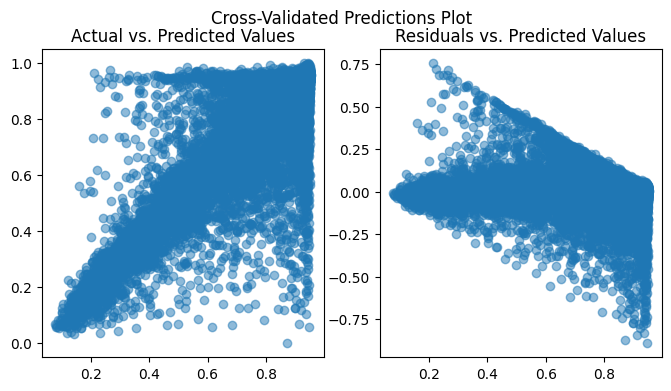

In [119]:
fig, axs = plt.subplots(ncols = 2,figsize = (8,4))
axs[0].scatter(x = y_pred, y = y,alpha = .5)
axs[0].set_title('Actual vs. Predicted Values')
axs[1].scatter(x = y_pred, y = res,alpha=.5)
axs[1].set_title('Residuals vs. Predicted Values')
fig.suptitle('Cross-Validated Predictions Plot')

In [125]:
y

array([0.95394329, 0.95960894, 0.94248864, ..., 0.89341384, 0.25307898,
       0.93115767])

In [128]:
y_pred = y_pred.flatten()


Text(0.5, 0.98, 'Predictions Plot')

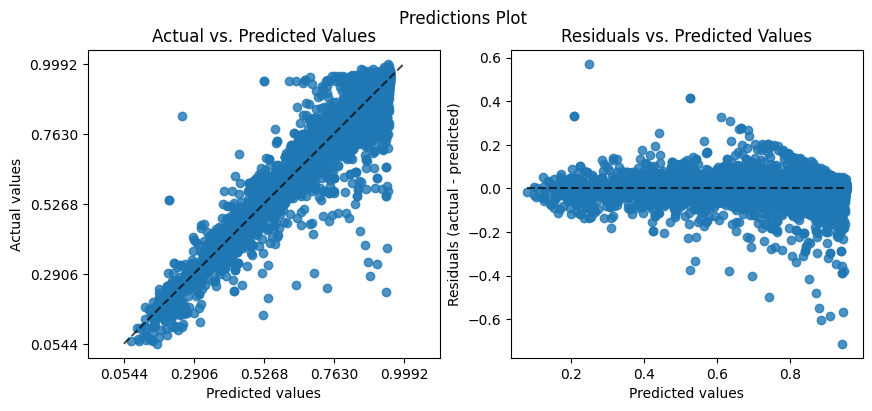

In [130]:

from sklearn.metrics import PredictionErrorDisplay
fig, axs = plt.subplots(ncols = 2, figsize = (10,4))
PredictionErrorDisplay.from_predictions(y,y_pred=y_pred,
                                        kind="actual_vs_predicted",
                                        ax=axs[0],random_state=0,
                                        subsample = 10000)
axs[0].set_title('Actual vs. Predicted Values')
PredictionErrorDisplay.from_predictions(y, y_pred,
                                        kind="residual_vs_predicted",
                                        ax=axs[1],
                                        random_state=0,
                                        subsample = 10000)
axs[1].set_title('Residuals vs. Predicted Values')
fig.suptitle('Predictions Plot')


In [131]:
import pickle

pickle_out = open("tree_regressor.pickle","wb")
pickle.dump(regressor, pickle_out)
pickle_out.close()

In [132]:
from google.colab import files
files.download('tree_regressor.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>